<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

**План работы:**
- Загрузить и изучить данные.
- Ответить на вопрос (Изменится ли качество линейной регрессии, если признаки умножают на обратимую матрицу) и обосновать решение.
- Предложить алгоритм преобразования данных для решения задачи.
- Запрограммировать этот алгоритм, применив матричные операции. Проверить качество линейной регрессии из sklearn, применив метрику R2.

**Данные**
- Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.
- Целевой признак: количество страховых выплат клиенту за последние 5 лет.

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/datasets/insurance.csv')

In [3]:
def plays(dev):
    display(dev.head(5))
    print('Датафрейм содержит', dev.shape[0], 'наблюдений и', dev.shape[1], 'признаков')
    print()
    dev.info()
    print()
    print('Наличие пропусков:', dev.isna().sum().sum())
    print('Наличие повторов:', dev.duplicated().sum())
    print()
    print(f'Сведения о распределении данных')
    print(dev.describe())
    print()
    print(f'Корреляция данных')
    print(dev.corr())
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(dev.corr(), annot=True, vmin=-1, vmax=1, center= 0, cmap= 'Purples', fmt='.1g');
    print()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


Датафрейм содержит 5000 наблюдений и 5 признаков

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB

Наличие пропусков: 0
Наличие повторов: 153

Сведения о распределении данных
               Пол      Возраст      Зарплата  Члены семьи  Страховые выплаты
count  5000.000000  5000.000000   5000.000000  5000.000000        5000.000000
mean      0.499000    30.952800  39916.360000     1.194200           0.148000
std       0.500049     8.440807   9900.083569     1.091387           0.463183
min       0.000000    18.000000   5300.000000     0.000000         

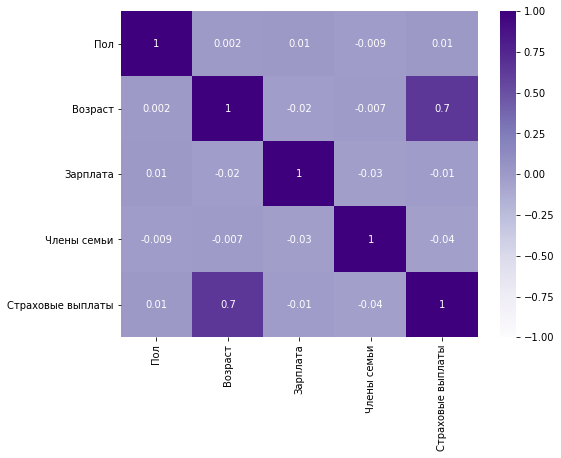

In [4]:
plays(df)

Удаляем повторы:

In [5]:
df = df.drop_duplicates()

**Вывод:**
- Датафрейм содержит 5000 наблюдений и 5 признаков
- Наличие пропусков: 0
- Наличие повторов: 153
- Данные распределены нормально, аномалий и выбросов нет
- Имеется высокая корреляция признака "Возраст" на целевой признак, остальные признаки влияния не оказывают.

Повторы удалены, данные готовы к дальнейшей работе.

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

- $E$ - единичная матрица

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** Качество линейной регресии после кодирования не измениться

**Обоснование:**  У линейной регрессии признаки — это вектор чисел в n-мерном пространстве. Предсказание модели вычисляется так: скалярно умножается вектор признаков на вектор весов , затем к этому произведению прибавляется величина сдвига предсказания. Отсюда следует, что умножение признаков на обратимый вектор не изменит предсказание модели.

Воспользуемся свойством матрицы
$$E = AA^T$$ 
$$E = AA^{-1}$$ 
$$ AE = EA = A$$
$$ E^T = E$$
$$E^{-1} = E$$

$$(A^T)^{-1} = (A^{-1})^T$$

Решение:
$$w' = ((XP)^T XP)^{-1} (XP)^T y = (P^T X^T X P)^{-1} P^T X^T y = $$
$$ (AB)^T=B^T A^T $$
$$(AB)^{-1} = B^{-1} A^{-1} $$
$$= P^{-1}(X^T X )^{-1} (P^T)^{-1} P^T X^T y =  $$
$$(P^T)^{-1} P^T$$
$$= P^{-1}(X^T X )^{-1} X^T y =  P^{-1} w $$
$$a = Xw = XEw = XPP^{-1}w = (XP)P^{-1}w = (XP)w'$$

## Алгоритм преобразования

**Алгоритм**

Для защиты данных можно использовать метод умножения данных на обратимую матрицу, по размерам совпадающую с размерами матрицы признаков

- Создаем случайную матрицу Z размера nхn, где n - это количество признаков.
- Проверяем ее на обратимость - вычисляем детерминант. Если он не равен 0 - матрица обратима.
- Перемножаем первоначальную матрицу A и Z и далее работаем с результатом - зашифрованной матрицей A_Z.
- Для восстановления матрицы A нужно зашифрованную матрицу A_Z умножить на обратную к Z

**Обоснование**

In [6]:
#создадим матрицу для проверки теории
A = np.array([[1, 2, 3, 4], [11, 12, 13, 14], [21, 22, 23, 24], [31, 32, 33, 34]])
A

array([[ 1,  2,  3,  4],
       [11, 12, 13, 14],
       [21, 22, 23, 24],
       [31, 32, 33, 34]])

In [7]:
Z = np.random.normal(size = (4,4)) #создаем рандомную матрицу для шифрования
Z

array([[-0.60590772,  0.19169494,  0.43522442,  0.26215258],
       [ 0.27532753,  0.33106445,  1.44872551, -0.92462718],
       [ 0.08304296,  0.49260858,  0.49513212,  0.21065936],
       [-1.60427213,  0.87084947, -1.06633741,  0.00699572]])

In [8]:
np.linalg.det(Z) #вычисляем детерминант

-1.1473314871072982

In [9]:
A_Z = A @ Z #зашифровываем данные
A_Z

array([[ -6.2232123 ,   5.81504744,   0.55272215,  -0.92714084],
       [-24.74130586,  24.67722175,  13.6801685 ,  -5.37533607],
       [-43.25939942,  43.53939606,  26.80761485,  -9.8235313 ],
       [-61.77749298,  62.40157037,  39.9350612 , -14.27172653]])

In [10]:
A_Z @ np.linalg.inv(Z) #расшифруем данные путем умножения на обратную Z

array([[ 1.,  2.,  3.,  4.],
       [11., 12., 13., 14.],
       [21., 22., 23., 24.],
       [31., 32., 33., 34.]])

**Вывод:**
Данный метод можно использовать для шифрования данных

## Проверка алгоритма

Обучим линейную регрессию на незашифрованных данных и оценим качество.

In [11]:
features = df.drop(['Страховые выплаты'], axis=1)
target = df['Страховые выплаты'] 
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345)

In [12]:
model = LinearRegression() 
model.fit(features_train, target_train) 
predictions_valid = model.predict(features_valid)

result = r2_score(target_valid, predictions_valid)  
print(f'R2 модели линейной регрессии на валидационной выборке: {result:,.3f}')

R2 модели линейной регрессии на валидационной выборке: 0.423


Обучим линейную регрессию на зашифрованных данных и оценим качество.

In [13]:
features_z = features.dot(Z)
target_z = df['Страховые выплаты']

In [14]:
features_train_z, features_valid_z, target_train_z, target_valid_z = train_test_split(
    features_z, target_z, test_size=0.25, random_state=12345)

In [15]:
model = LinearRegression() 
model.fit(features_train_z, target_train_z) 
predictions_valid = model.predict(features_valid_z)

result = r2_score(target_valid_z, predictions_valid)  
print(f'R2 модели линейной регрессии на валидационной выборке: {result:,.3f}')

R2 модели линейной регрессии на валидационной выборке: 0.423


**Вывод:**
    Качество не изменилось. Можно использовать наш алгоритм для шифрования данных.